<a href="https://colab.research.google.com/github/pa-legg/sdav-module/blob/main/activity_11_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 11 - File Visualisation and Video Visualisation

This notebook illustrates some techniques for visualisation binary file systems, and also looks at multimedia visualisation for image and video data.

28872


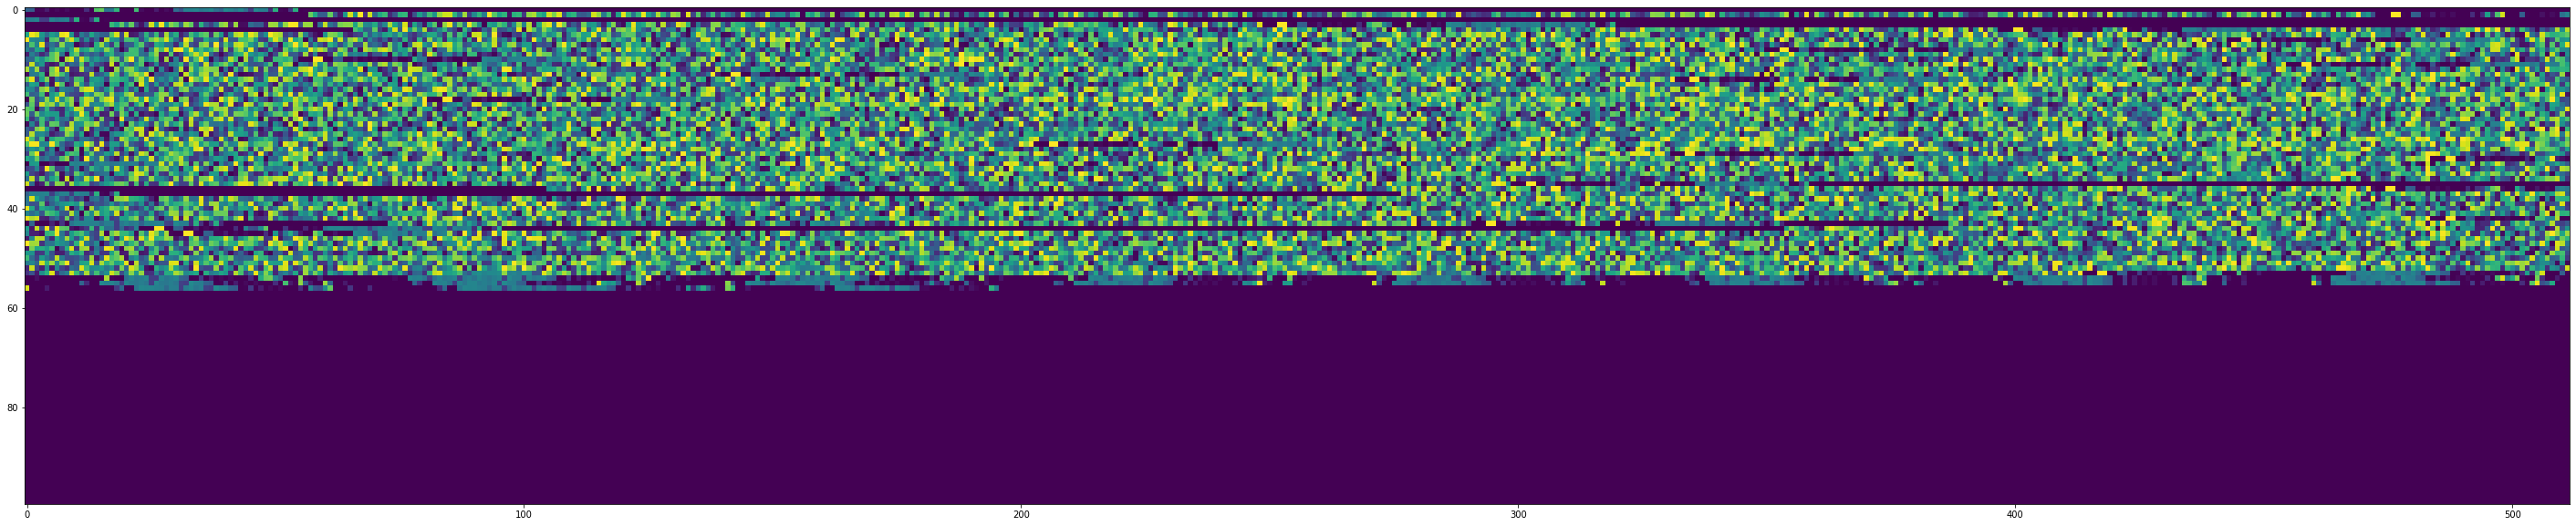

Plot of file:  short_sample.docx
35840


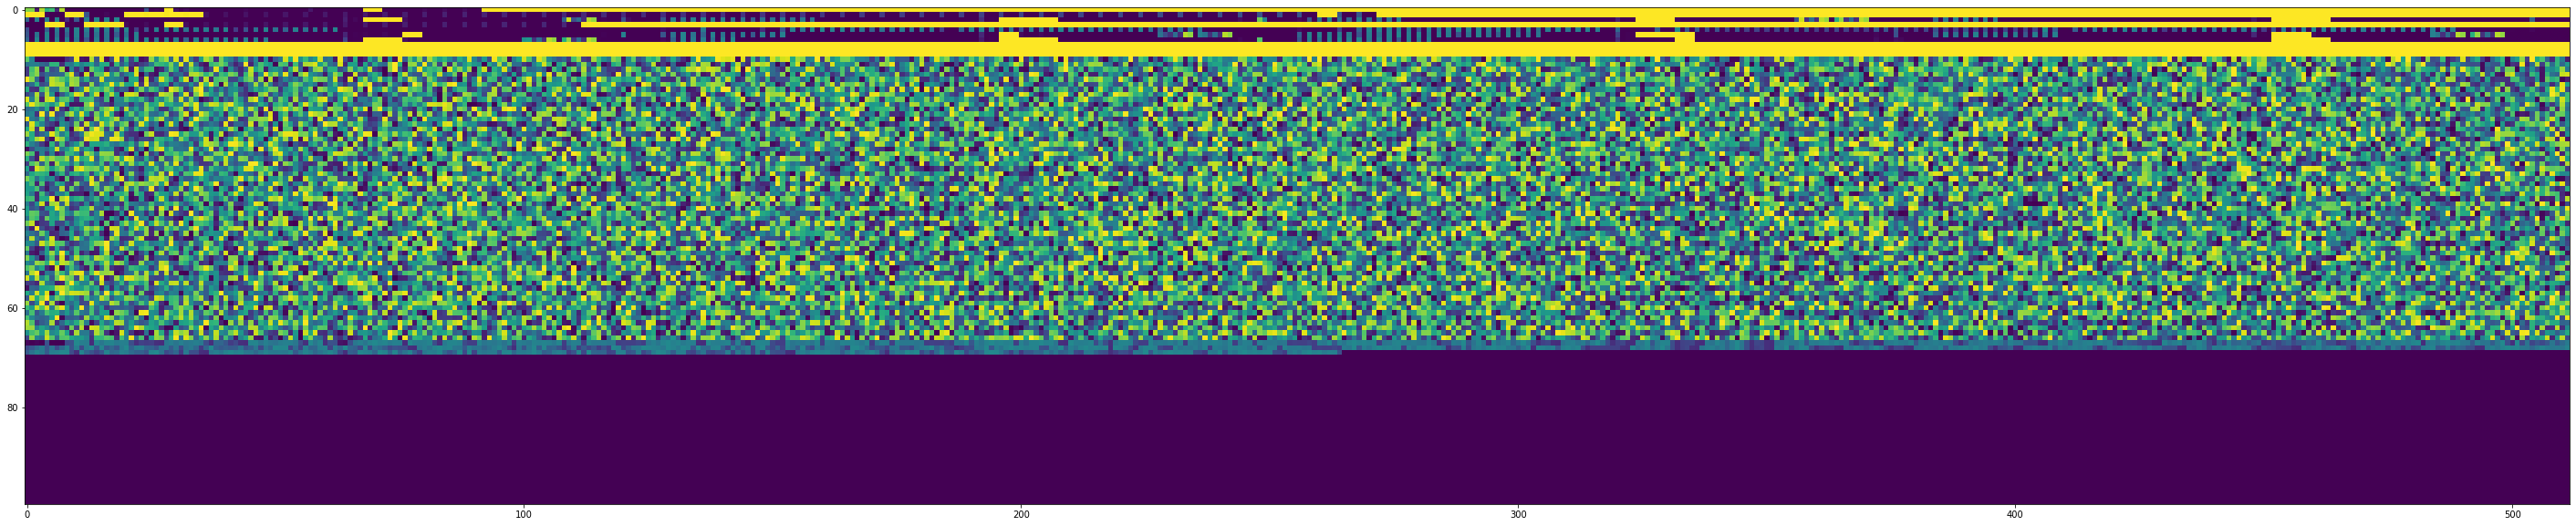

Plot of file:  short_sample_password.docx
28896


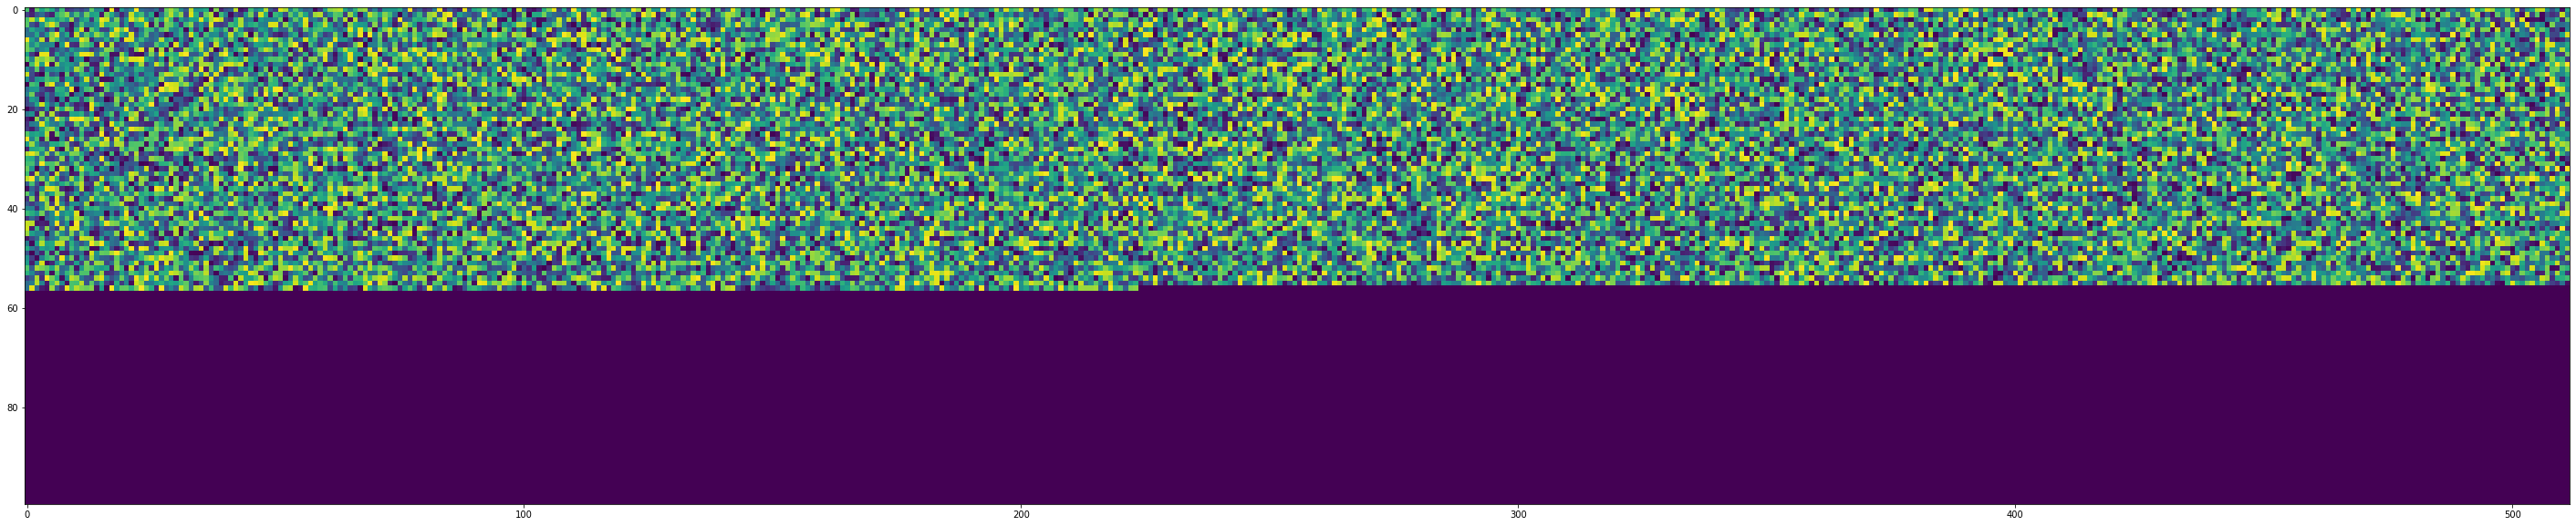

Plot of file:  2020_sample_page.enc


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_plot_of_file(filename):
    plot_data = np.zeros([51200])
    with open(filename, "rb") as f:
        byte = f.read(1)
        counter = 0
        while byte != b'':
            i = int.from_bytes(byte, byteorder='big')
            #print (byte, i, counter)
            plot_data[counter] = i
            counter += 1
            byte = f.read(1)
    print (counter)

    plt.figure(figsize=(50,50))
    plot_data = np.array(plot_data).reshape(-1, 512)
    plt.imshow(plot_data)
    plt.imsave(filename + ".png", plot_data)
    plt.show()
    return plot_data


filename = "./data/short_sample.docx"
create_plot_of_file(filename)
print ("Plot of file: ",  filename)

filename = "./data/short_sample_password.docx"
create_plot_of_file(filename)
print ("Plot of file: ",  filename)

src = "./data/short_sample.docx"

#!pip3 install pycryptodome

from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
key = get_random_bytes(16)

file_in = open(src, "rb")
data = file_in.read()
file_in.close()

output_file = "./data/short_sample.enc"

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad


# Create cipher object and encrypt the data
cipher = AES.new(key, AES.MODE_CBC) # Create a AES cipher object with the key using the mode CBC
ciphered_data = cipher.encrypt(pad(data, AES.block_size)) # Pad the input data and then encrypt

file_out = open(output_file, "wb") # Open file to write bytes
file_out.write(cipher.iv) # Write the iv to the output file (will be required for decryption)
file_out.write(ciphered_data) # Write the varying length ciphertext to the file (this is the encrypted data)
file_out.close()

filename = "./data/2020_sample_page.enc"
create_plot_of_file(filename)
print ("Plot of file: ",  filename)


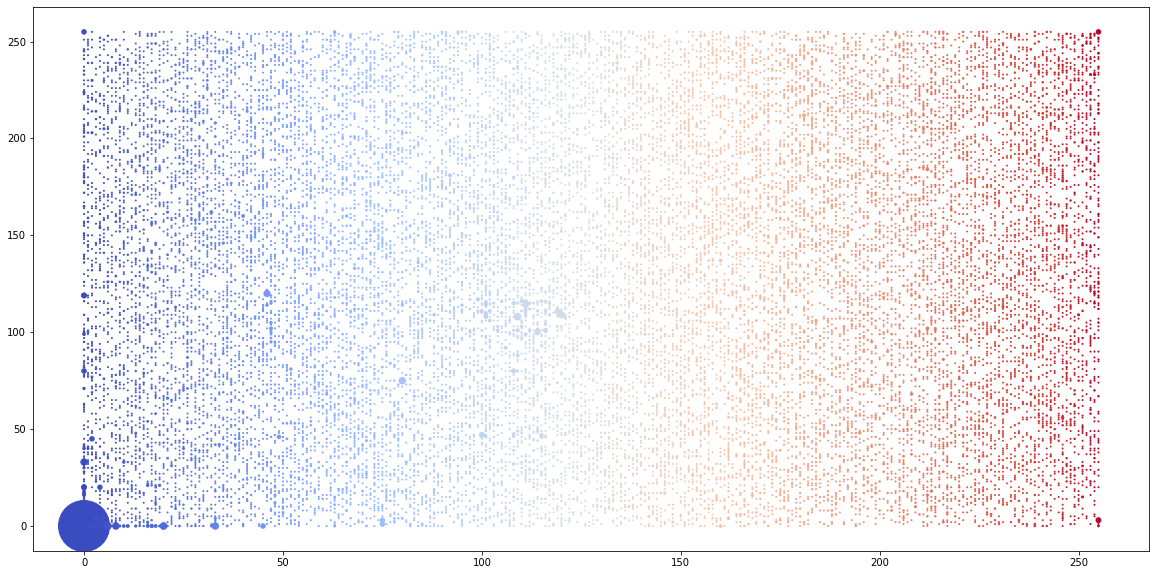

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plot_data = []

#filename = "phil_bw.jpg"
#filename = "story.txt"
filename = "./data/short_sample.docx"

with open(filename, "rb") as f:
    byte = f.read(1)
    counter = 0
    while byte != b'':
        i = int.from_bytes(byte, byteorder='big')
        #print (byte, i, counter)
        plot_data.append(i)
        counter += 1
        byte = f.read(1)

plot_data = np.array(plot_data)
first = plot_data[:-1]
second = plot_data[1:]

matrix = np.zeros([256,256])

for i in range(len(first)):
    #print (i, first[i], second[i])
    matrix[first[i], second[i]] = matrix[first[i], second[i]] + 1

import matplotlib.cm as cm
points = np.where(matrix > 0)
size = matrix[points[0], points[1]]
index = np.array(range(points[0].shape[0]))
plt.figure(figsize=(20,10))
plt.scatter(points[0], points[1], c=cm.coolwarm(index / len(index)), s=size)
plt.show()

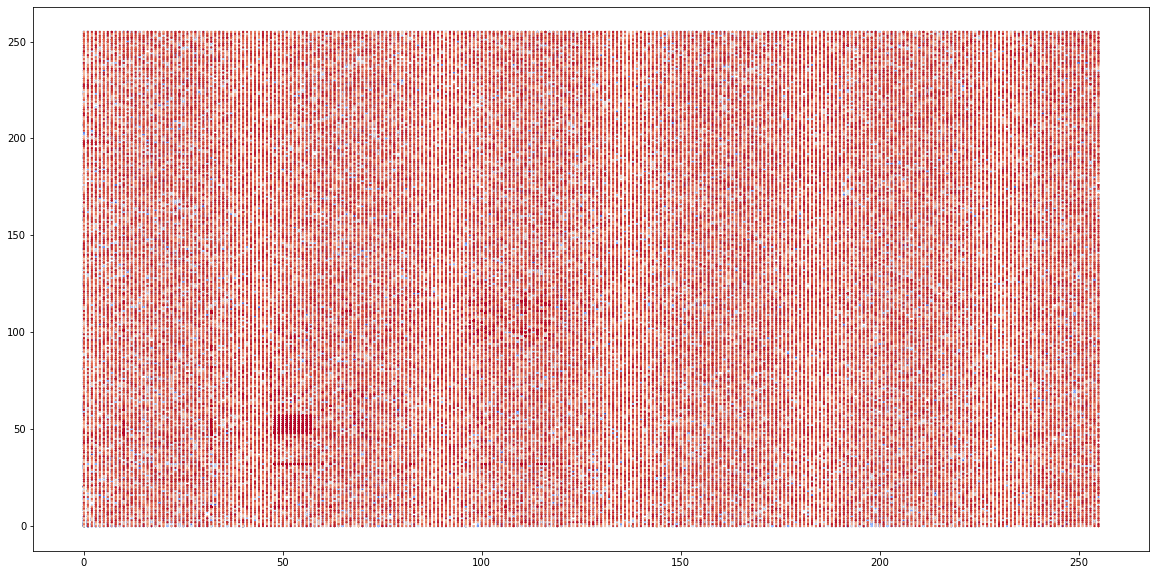

Filename:  09-transcript.pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plot_data = []

filename = "./data/09-transcript.pdf"

with open(filename, "rb") as f:
    byte = f.read(1)
    counter = 0
    while byte != b'':
        i = int.from_bytes(byte, byteorder='big')
        #print (byte, i, counter)
        plot_data.append(i)
        counter += 1
        byte = f.read(1)

plot_data = np.array(plot_data)
first = plot_data[:-1]
second = plot_data[1:]

index = np.array(range(first.shape[0])) 
index = index / len(index)
plt.figure(figsize=(20,10))
plt.scatter(first, second, c=cm.coolwarm(index), s=1)
plt.show()
print ("Filename: ", filename)

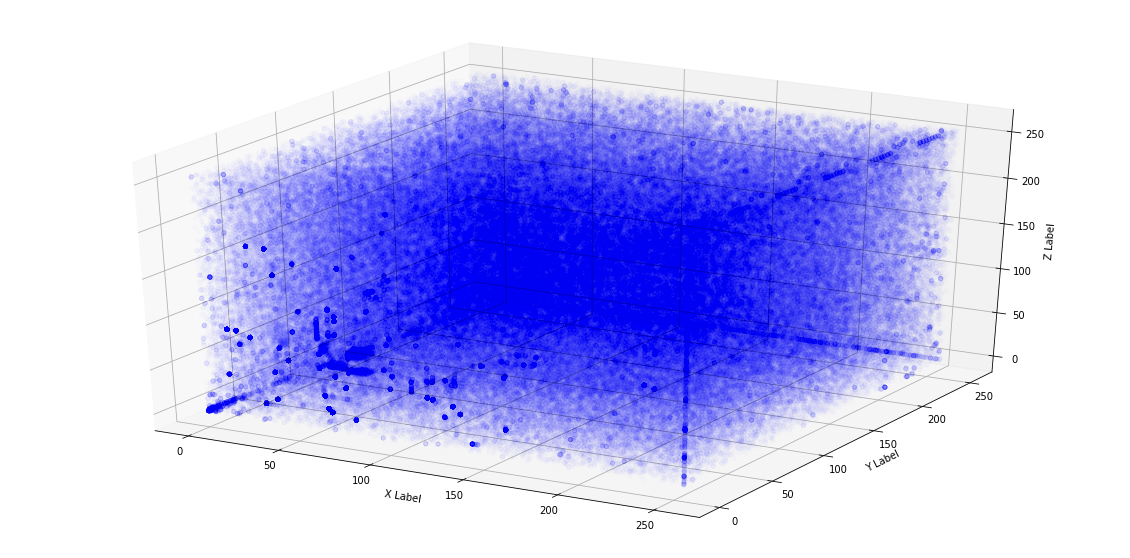

In [ ]:
# Let's try a 3D version just to show that it is relatively straightforward to extend
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

plot_data = np.array(plot_data)
first = plot_data[:-2]
second = plot_data[1:-1]
third = plot_data[2:]
ax.scatter(first, second, third, c='blue', alpha=0.01)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Video Analytics

Here we look at how we can manipulate video data to learn about the content of this. This could be useful for identifying individuals, or for identifying activity of suspicious nature.
We use a video that consists of 20 different people - the idea being that we should be able to recognise that there are 20 unique users in our data.

In [ ]:
# !pip3 install scikit-video

# Make sure you have ffmpeg installed for skvideo to work

import matplotlib.pyplot as plt
import skvideo.io
import numpy as np

print("FFmpeg path: {}".format(skvideo.getFFmpegPath()))
print("FFmpeg version: {}".format(skvideo.getFFmpegVersion()))

videodata = skvideo.io.vread("./data/09_faces.mp4")
print(videodata.shape)

# rather than processing every video frame, lets grab every 30 frames (as we know the video is 30fps)
frame_rate = 30
new_video = videodata[0::frame_rate, :, :, :]
print (new_video.shape)

matrix = np.zeros([new_video.shape[1] * new_video.shape[2], new_video.shape[0]])

framecount = 0

for frame in new_video:
    print (framecount, frame.shape)
    pixelcount = 0
    for row in range(frame.shape[0]):
        for col in range(frame.shape[1]):
            pixel = frame[row,col,:]
            greyscale = np.mean(pixel)
            matrix[pixelcount, framecount] = greyscale
            pixelcount += 1
    framecount += 1
    
matrix = matrix.T

FFmpeg path: /usr/local/bin
FFmpeg version: b'4'.b'3'.b'1'
(4574, 360, 480, 3)
(153, 360, 480, 3)
0 (360, 480, 3)
1 (360, 480, 3)
2 (360, 480, 3)
3 (360, 480, 3)
4 (360, 480, 3)
5 (360, 480, 3)
6 (360, 480, 3)
7 (360, 480, 3)
8 (360, 480, 3)
9 (360, 480, 3)
10 (360, 480, 3)
11 (360, 480, 3)
12 (360, 480, 3)
13 (360, 480, 3)
14 (360, 480, 3)
15 (360, 480, 3)
16 (360, 480, 3)
17 (360, 480, 3)
18 (360, 480, 3)
19 (360, 480, 3)
20 (360, 480, 3)
21 (360, 480, 3)
22 (360, 480, 3)
23 (360, 480, 3)
24 (360, 480, 3)
25 (360, 480, 3)
26 (360, 480, 3)
27 (360, 480, 3)
28 (360, 480, 3)
29 (360, 480, 3)
30 (360, 480, 3)
31 (360, 480, 3)
32 (360, 480, 3)
33 (360, 480, 3)
34 (360, 480, 3)
35 (360, 480, 3)
36 (360, 480, 3)
37 (360, 480, 3)
38 (360, 480, 3)
39 (360, 480, 3)
40 (360, 480, 3)
41 (360, 480, 3)
42 (360, 480, 3)
43 (360, 480, 3)
44 (360, 480, 3)
45 (360, 480, 3)
46 (360, 480, 3)
47 (360, 480, 3)
48 (360, 480, 3)
49 (360, 480, 3)
50 (360, 480, 3)
51 (360, 480, 3)
52 (360, 480, 3)
53 (360, 48

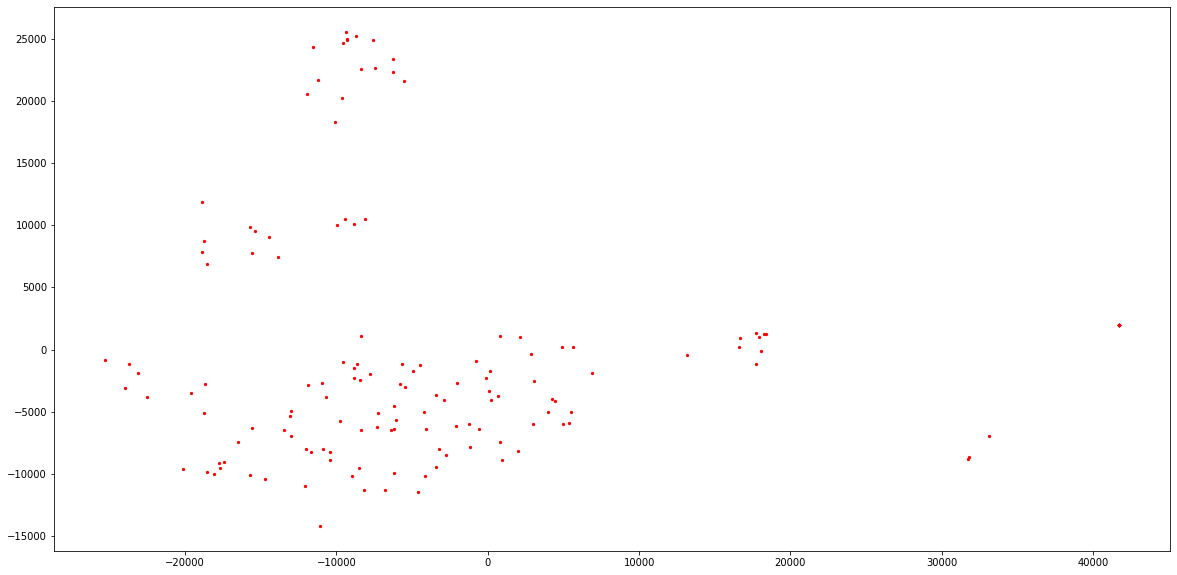

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(matrix)
fig = plt.figure(figsize=(20,10))
plot = fig.add_subplot(111)
plot.scatter(data[:,0],data[:,1], s=5, c='red', alpha=1)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(data)
kmeans.labels_

array([ 1,  8,  8,  8,  1, 19, 19, 19, 19,  9,  1, 13, 13, 13, 13, 13,  1,
        0,  0,  0,  0,  1,  2,  2,  2,  2,  2,  2,  2,  1,  4, 18, 18, 18,
       18, 18, 14,  4, 14, 14, 14,  4,  4,  4, 18, 18,  1, 15, 15, 15, 15,
        1,  3, 15, 15, 15, 12, 12, 12, 19,  1, 12, 16, 16, 17, 17, 10, 17,
       10, 12, 12, 19, 10,  7,  7, 16, 16, 12, 12,  1,  2, 11, 11, 11, 11,
        9,  2,  1, 15,  6,  9,  9,  6,  9,  9,  9,  6,  9,  9,  1,  0,  0,
        0, 16,  7,  7, 16, 10, 10,  3,  3,  3,  3,  3,  3, 17, 10, 17,  1,
       16, 16, 16,  1, 10,  3,  3,  3, 12, 10, 10,  1, 17, 17, 17, 17,  1,
        5,  5,  5,  5,  5,  5,  5,  5,  1, 15,  7,  1,  0,  5,  0,  0,  0],
      dtype=int32)

In [ ]:
from colorsys import hls_to_rgb
import numpy as np 

def get_distinct_colors(n):

    colors = []

    for i in np.arange(0., 360., 360. / n):
        h = i / 360.
        l = (50 + np.random.rand() * 10) / 100.
        s = (90 + np.random.rand() * 10) / 100.
        colors.append(hls_to_rgb(h, l, s))

    return colors

In [ ]:
ccc = get_distinct_colors(20)
ccc

[(0.9768984862997349, 0.13551848314611614, 0.13551848314611614),
 (0.9729082159015792, 0.3695862132182482, 0.11101964063967773),
 (0.9806740850106073, 0.5996206297049673, 0.028040446746507408),
 (0.9717581940036768, 0.8962394231920209, 0.21657048588711802),
 (0.8128981819711085, 0.9594320534851257, 0.2267626959150406),
 (0.5485945797485394, 0.9766248131607985, 0.12056434633627988),
 (0.32205542113861496, 0.9631523513578364, 0.16178118858380963),
 (0.04512790094074326, 0.9608982790452392, 0.13670493875119283),
 (0.17987054270278846, 0.997167413245504, 0.5067892909198748),
 (0.19232765408690244, 0.9889372900358581, 0.7499543992511715),
 (0.20344904953236131, 0.9959503838820144, 0.9959503838820145),
 (0.09137267387791514, 0.7028257009881822, 0.9648769983211544),
 (0.15878323912934222, 0.49226655112538875, 0.9924915191194588),
 (0.14972085619794528, 0.23280722343911234, 0.9805845286096186),
 (0.26759707152088985, 0.09069648793134177, 0.9751994058790853),
 (0.5838099625342683, 0.18853520589

In [ ]:
number = 20
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
colors

[(1.0, 0.0, 0.16, 1.0),
 (1.0, 0.11340752517223107, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.6857445680975094, 0.0, 1.0),
 (1.0, 0.9613142554319024, 0.0, 1.0),
 (0.7419183889772125, 1.0, 0.0, 1.0),
 (0.4663487016428193, 1.0, 0.0, 1.0),
 (0.1695813460519343, 1.0, 0.0, 1.0),
 (0.0, 1.0, 0.1054185114906178, 1.0),
 (0.0, 1.0, 0.40059034366434765, 1.0),
 (0.0, 1.0, 0.6746784735399539, 1.0),
 (0.0, 1.0, 0.9698503057136831, 1.0),
 (0.0, 0.753410059676044, 1.0, 1.0),
 (0.0, 0.4550298380221651, 1.0, 1.0),
 (0.0, 0.1779624893435633, 1.0, 1.0),
 (0.12041773231031558, 0.0, 1.0, 1.0),
 (0.39748508098891755, 0.0, 1.0, 1.0),
 (0.6958653026427966, 0.0, 1.0, 1.0),
 (0.9729326513213985, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.75, 1.0)]

In [ ]:
color_set = []
for i in kmeans.labels_:
    color_set.append(colors[i])
color_set

[(1.0, 0.11340752517223107, 0.0, 1.0),
 (0.0, 1.0, 0.1054185114906178, 1.0),
 (0.0, 1.0, 0.1054185114906178, 1.0),
 (0.0, 1.0, 0.1054185114906178, 1.0),
 (1.0, 0.11340752517223107, 0.0, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (1.0, 0.0, 0.75, 1.0),
 (0.0, 1.0, 0.40059034366434765, 1.0),
 (1.0, 0.11340752517223107, 0.0, 1.0),
 (0.0, 0.4550298380221651, 1.0, 1.0),
 (0.0, 0.4550298380221651, 1.0, 1.0),
 (0.0, 0.4550298380221651, 1.0, 1.0),
 (0.0, 0.4550298380221651, 1.0, 1.0),
 (0.0, 0.4550298380221651, 1.0, 1.0),
 (1.0, 0.11340752517223107, 0.0, 1.0),
 (1.0, 0.0, 0.16, 1.0),
 (1.0, 0.0, 0.16, 1.0),
 (1.0, 0.0, 0.16, 1.0),
 (1.0, 0.0, 0.16, 1.0),
 (1.0, 0.11340752517223107, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.0, 0.3889772125066243, 0.0, 1.0),
 (1.

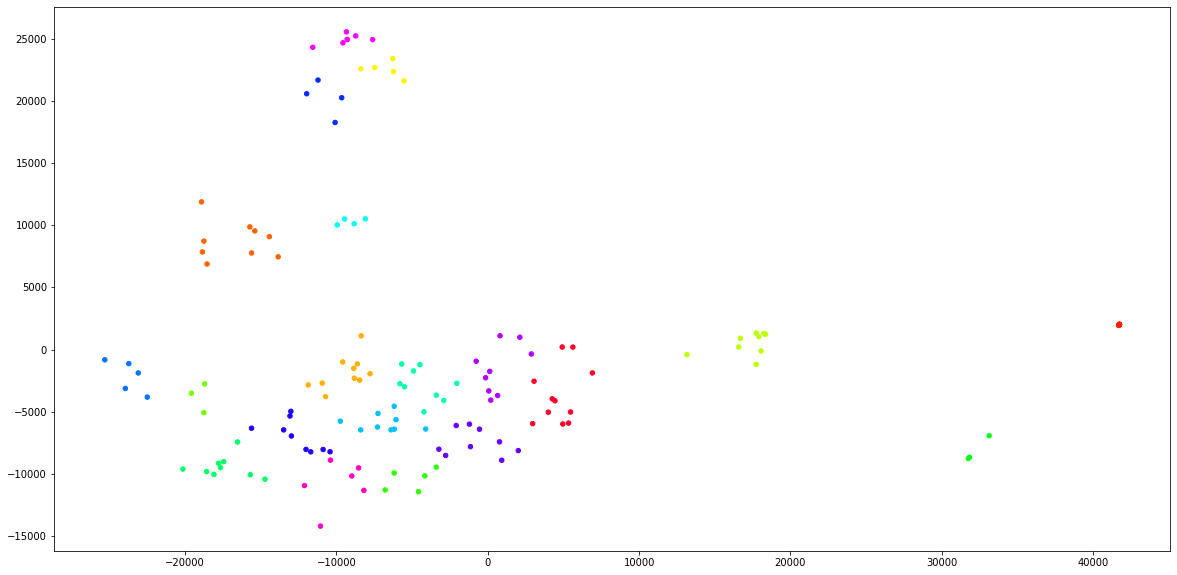

In [ ]:
fig = plt.figure(figsize=(20,10))
plot = fig.add_subplot(111)
plot.scatter(data[:,0],data[:,1], s=20, c=color_set, alpha=1)
plt.show()

Shape of filter:  (7,)
Selection shape:  (7, 172800)


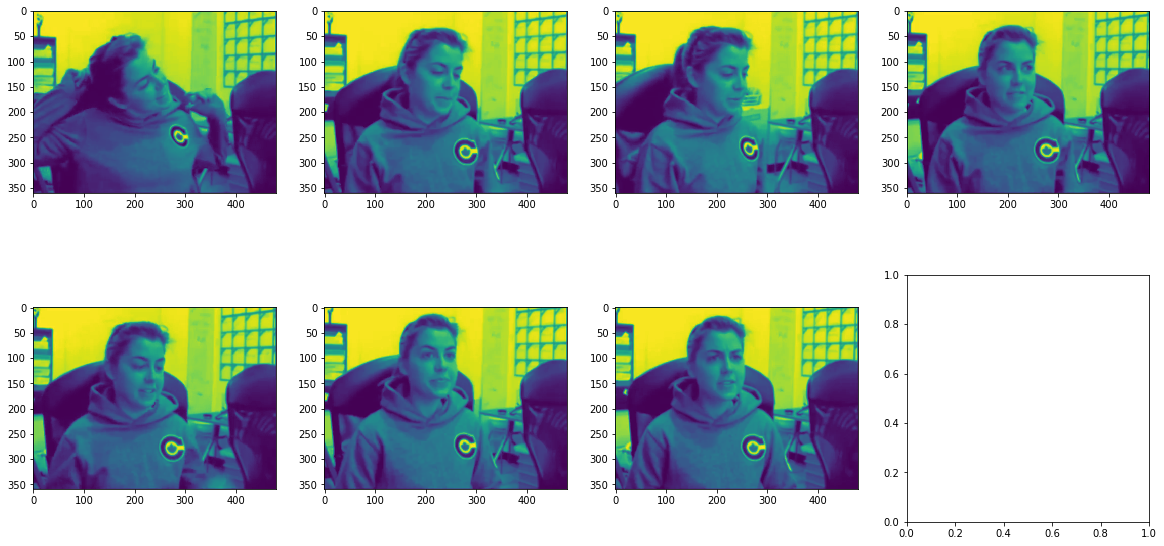

In [ ]:
### Now we see our 20 clusters, let's try selecting one, and filtering our data
### Note that some have worked better than others here... :)

rows = np.where(kmeans.labels_ == 18)
print ("Shape of filter: ", rows[0].shape)

selection = matrix[rows[0], :]
print ("Selection shape: ", selection.shape)

f, axarr = plt.subplots(int(selection.shape[0] / 4) + 1, 4, figsize=(20,10))

for s in range(selection.shape[0]):
    image = selection[s,:]
    image = image.reshape(360,480)
    axarr[int(s/4),s%4].imshow(image)

plt.show()

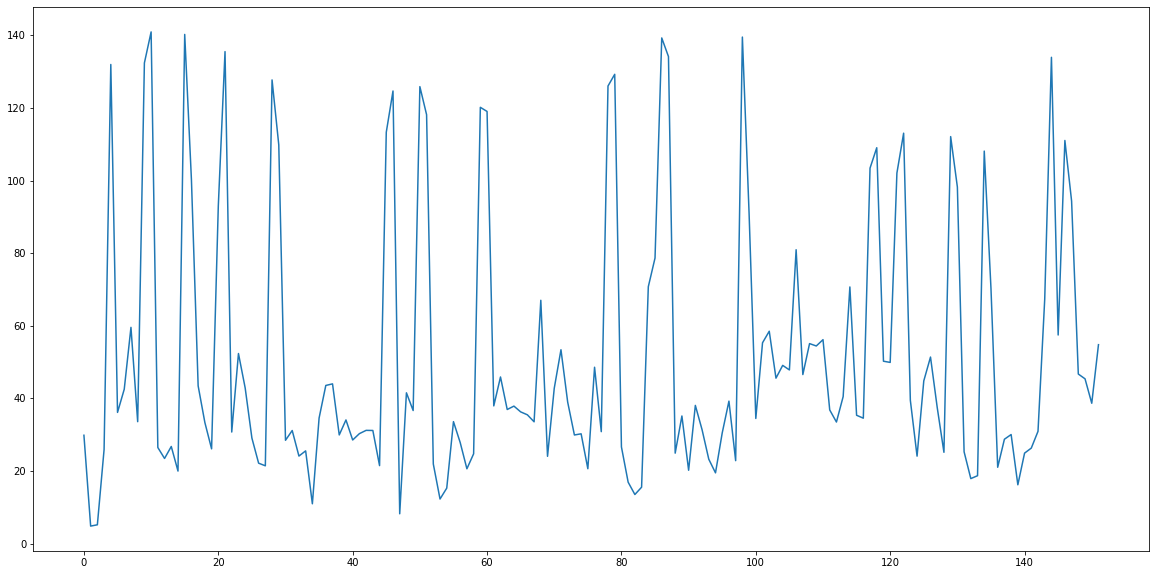

In [ ]:
diffs = []
frame_number_diffs = []
for frame_number in range(matrix.shape[0] - 1):
    diff = np.mean(np.abs(matrix[frame_number,:] - matrix[frame_number+1,:]))
    diffs.append(diff)
    if diff > 100:
        frame_number_diffs.append(frame_number)
plt.figure(figsize=(20,10))
plt.plot(diffs)
plt.show()

[4, 9, 10, 15, 16, 21, 28, 29, 45, 46, 50, 51, 59, 60, 78, 79, 86, 87, 98, 117, 118, 121, 122, 129, 134, 144, 146]
[121]
0 121


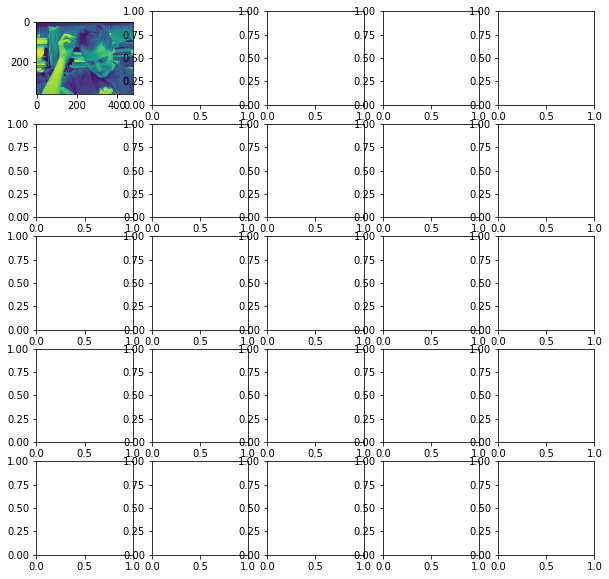

In [ ]:
print (frame_number_diffs)
val = 21
selection = list(range(frame_number_diffs[val], frame_number_diffs[val+1]))
print (selection)
f, axarr = plt.subplots(5,5, figsize=(10,10))

for s in range(len(selection)):
    print (s, selection[s])
    image = matrix[selection[s],:]
    image = image.reshape(360,480)
    axarr[int(s/5),s%5].imshow(image)

plt.show()